In [102]:
numbers_to_remove = [79, 80, 81]
# adding columns for which there are NaNs in SARIMA
numbers_to_remove += [1, 4, 15, 16, 17, 18, 26, 28, 29, 40, 42, 47, 54, 59, 67, 71, 77]

In [103]:
import pandas as pd

data_raw = pd.read_csv("D:/AGH/bankomaty_2022/data/modelling_data/atm_data.csv").rename(columns={"Values": "date"})


In [104]:
from utils import ends_with_number

cols_to_drop = data_raw.columns[data_raw.columns.str.startswith('ATM_N_')]
df = data_raw.loc[:, ~data_raw.columns.isin(cols_to_drop)]

columns_to_keep = [column for column in df.columns if not ends_with_number(column, ['{:02d}'.format(num) for num in numbers_to_remove])]

# Remove the columns from the data frame
df = df[columns_to_keep]

In [105]:
df

,date,ATM_W_02,ATM_W_03,ATM_W_05,ATM_W_06,ATM_W_07,ATM_W_08,ATM_W_09,ATM_W_10,ATM_W_11,...,ATM_W_66,ATM_W_68,ATM_W_69,ATM_W_70,ATM_W_72,ATM_W_73,ATM_W_74,ATM_W_75,ATM_W_76,ATM_W_78
0,2017-01-01,2670,3040,9940,4390,6780,11220,470,1660,2230,...,4610,7820,3250,5700,1010,10450,13850,6400,7510,0
1,2017-01-02,27150,20140,34110,44440,24930,84960,15060,9450,27820,...,35490,32100,33420,35910,19970,27100,21630,18140,21250,30420
2,2017-01-03,23950,29860,32340,43300,56210,63140,9700,23910,24580,...,29460,37500,21770,38720,13430,37600,27810,47270,10780,40240
3,2017-01-04,36560,13040,34610,41800,51340,70730,12840,7330,23420,...,37940,25320,32500,40560,21040,31650,5260,66970,19710,22020
4,2017-01-05,21920,27030,39010,55060,54800,41080,17690,21540,24150,...,46540,21370,27090,45690,19700,45900,29890,47720,22270,28870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1560,2021-04-10,23070,20190,31220,26300,40960,52510,13740,10440,30870,...,26230,8110,17300,21020,8160,14000,2960,50550,8840,13850
1561,2021-04-11,28240,11330,13380,26830,31230,36440,3740,3050,7790,...,15870,4640,3730,6230,12450,10950,600,30980,16450,0
1562,2021-04-12,30040,26840,31180,38020,30230,45000,8680,8100,23700,...,36960,9140,14870,33720,10870,20350,1710,71290,24040,21070
1563,2021-04-13,27380,25860,34250,26590,17090,66060,13950,19480,12010,...,27430,5480,13600,25230,23250,21300,740,34740,20050,11940


In [106]:
import pandas as pd

# Replace 'ATM_W_XX' with 'ATM XX' in column names
new_column_names = [col.replace('ATM_W_', 'ATM ') for col in df.columns]
df.columns = new_column_names

# Calculate summary statistics for each ATM column
summary_statistics = df.describe().transpose()

# Calculate aggregated statistics for all ATMs
df['total_withdrawals'] = df.iloc[:, 1:].sum(axis=1)
aggregated_statistics = df['total_withdrawals'].describe().to_frame().transpose()

# Rename the index of aggregated_statistics
aggregated_statistics.index = ['All ATMs']

# Combine summary and aggregated statistics
combined_statistics = pd.concat([summary_statistics, aggregated_statistics], axis=0)

# Rename the summary statistics columns
combined_statistics.columns = [
    'Count', 'Mean', 'Standard Deviation', 'Minimum', '25th Percentile',
    'Median', '75th Percentile', 'Maximum'
]

# Format the index (first column) with proper capitalization
combined_statistics.index = combined_statistics.index.str.replace('_', ' ').str.title()

# Round the numeric values and remove decimals
combined_statistics = combined_statistics.round(0).astype(int)

# Export the combined statistics as a CSV file
combined_statistics.to_csv('D:/AGH/bankomaty_2022/data/EDA_results/atm_summary_statistics.csv')

print("Summary and aggregated statistics exported to 'atm_summary_statistics.csv'")


Summary and aggregated statistics exported to 'atm_summary_statistics.csv'


In [107]:
import pandas as pd

from utils import summary_statistics_summary

# Assuming 'data' is your DataFrame containing ATM withdrawal data
summary_stats_across_atms = summary_statistics_summary(df)
print(summary_stats_across_atms)


                              Count     Mean  Standard Deviation  Minimum  \
Statistic Count                  62       62                  62       62   
Statistic Mean                 1565    48355               22083     2354   
Statistic Standard Deviation      0   187774               72172    18403   
Statistic Minimum              1565     7627                4773        0   
Statistic 25th Percentile      1565    16059                9142        0   
Statistic Median               1565    21940               12061        0   
Statistic 75th Percentile      1565    29735               14764        0   
Statistic Maximum              1565  1499019              578745   144920   

                              25th Percentile   Median  75th Percentile  \
Statistic Count                            62       62               62   
Statistic Mean                          32701    48120            62477   
Statistic Standard Deviation           138193   192497           238442   
Statis

In [108]:
import pandas as pd

# Assuming 'data' is your DataFrame containing ATM withdrawal data

# Split dataset into pre-COVID and during-COVID periods
pre_covid_data = df[df['date'] < '2020-03-01']
during_covid_data = df[df['date'] >= '2020-03-01']

# Apply the summary_statistics_summary function
pre_covid_summary = summary_statistics_summary(pre_covid_data)
during_covid_summary = summary_statistics_summary(during_covid_data)

# Save the results to CSV files
pre_covid_summary.to_csv('D:/AGH/bankomaty_2022/data/EDA_results/pre_covid_summary.csv', index=True)
during_covid_summary.to_csv('D:/AGH/bankomaty_2022/data/EDA_results/during_covid_summary.csv', index=True)


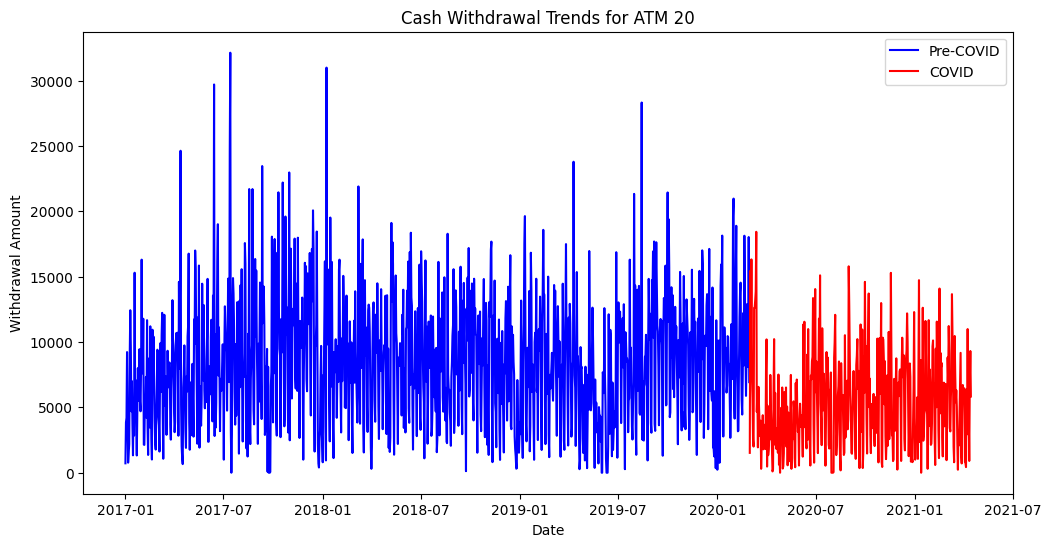

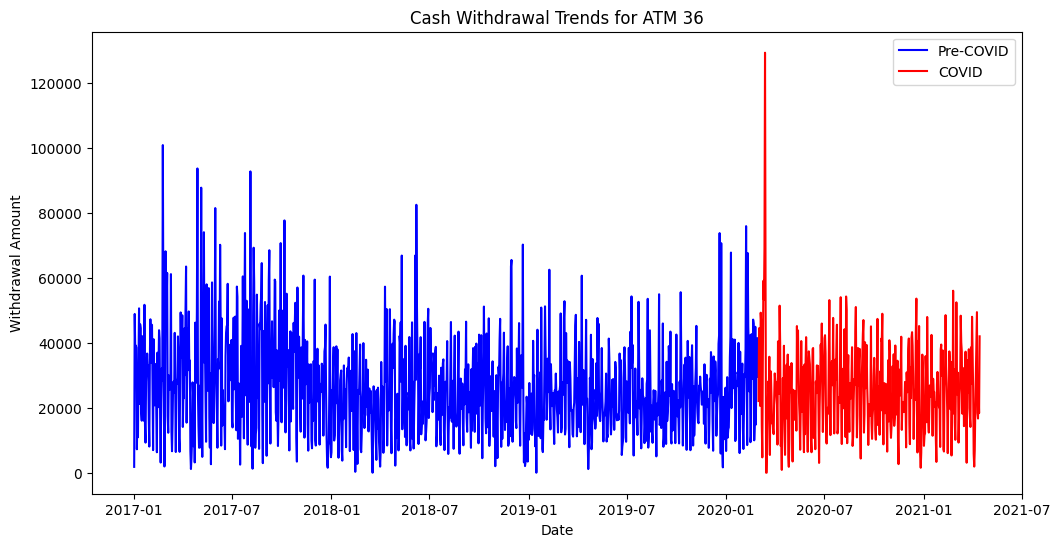

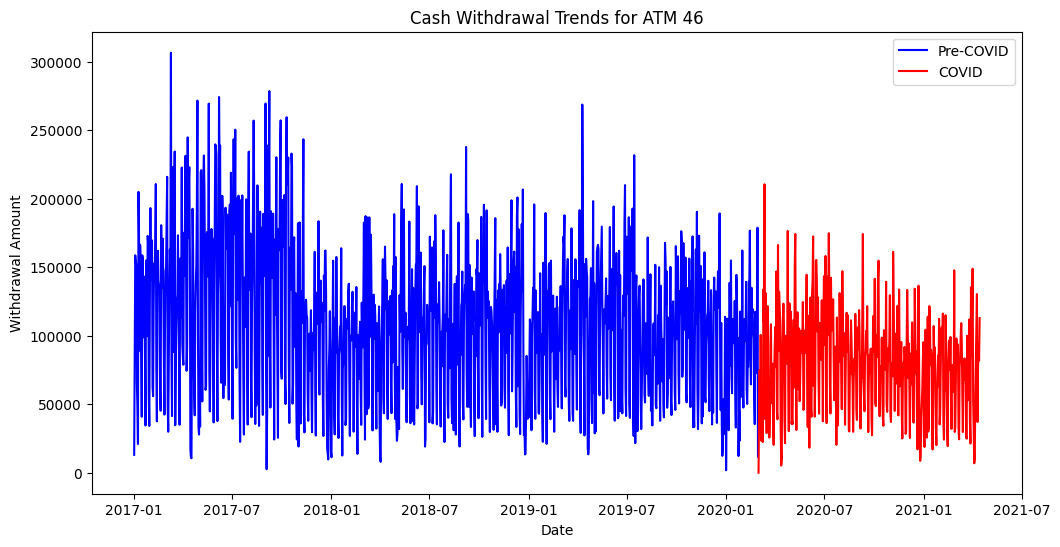

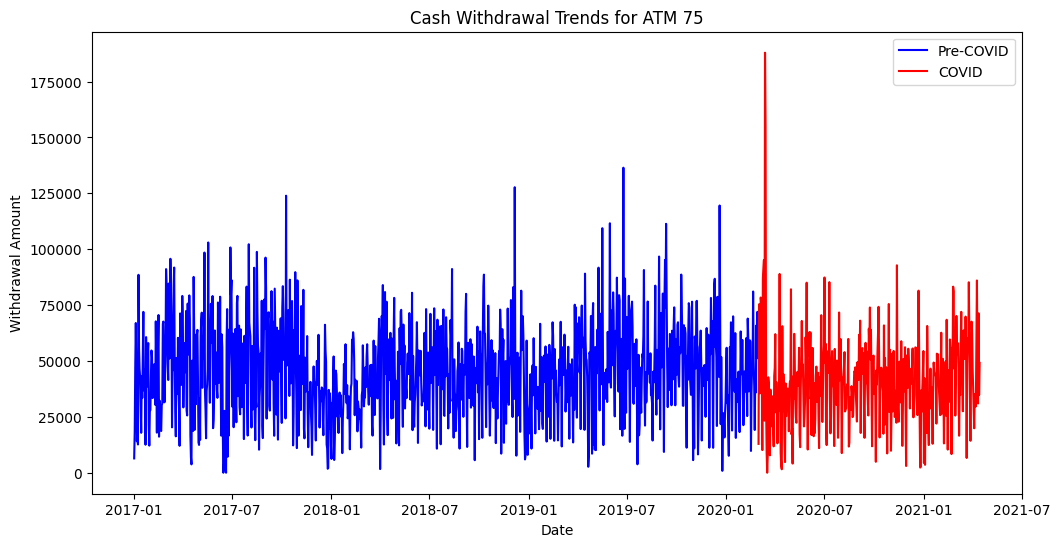

In [109]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a dataframe `df` with columns 'date', 'ATM XX', and 'total_withdrawals'
# The date column should be in datetime format
df['date'] = pd.to_datetime(df['date'])

# Split the dataset into pre-COVID and during COVID
pre_covid_date = pd.to_datetime("2020-03-01")  # Assuming the pre-COVID period ends on February 29th, 2020
pre_covid_data = df[df['date'] < pre_covid_date]
covid_data = df[df['date'] >= pre_covid_date]

# Selected ATMs
selected_atms = ['ATM 20', 'ATM 36', 'ATM 46', 'ATM 75']

def plot_atm_withdrawals(pre_covid_data, covid_data, atm_id):
    plt.figure(figsize=(12, 6))
    plt.plot(pre_covid_data['date'], pre_covid_data[atm_id], label='Pre-COVID', color='blue')
    plt.plot(covid_data['date'], covid_data[atm_id], label='COVID', color='red')
    plt.xlabel('Date')
    plt.ylabel('Withdrawal Amount')
    plt.title(f'Cash Withdrawal Trends for {atm_id}')
    plt.legend()
    plt.show()

# Plot the selected ATMs
for atm_id in selected_atms:
    plot_atm_withdrawals(pre_covid_data, covid_data, atm_id)


C:\Users\amachno\AppData\Local\Temp\ipykernel_25372\490397622.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_covid_data['total_withdrawals'] = pre_covid_data[atm_columns].sum(axis=1)
C:\Users\amachno\AppData\Local\Temp\ipykernel_25372\490397622.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_data['total_withdrawals'] = covid_data[atm_columns].sum(axis=1)


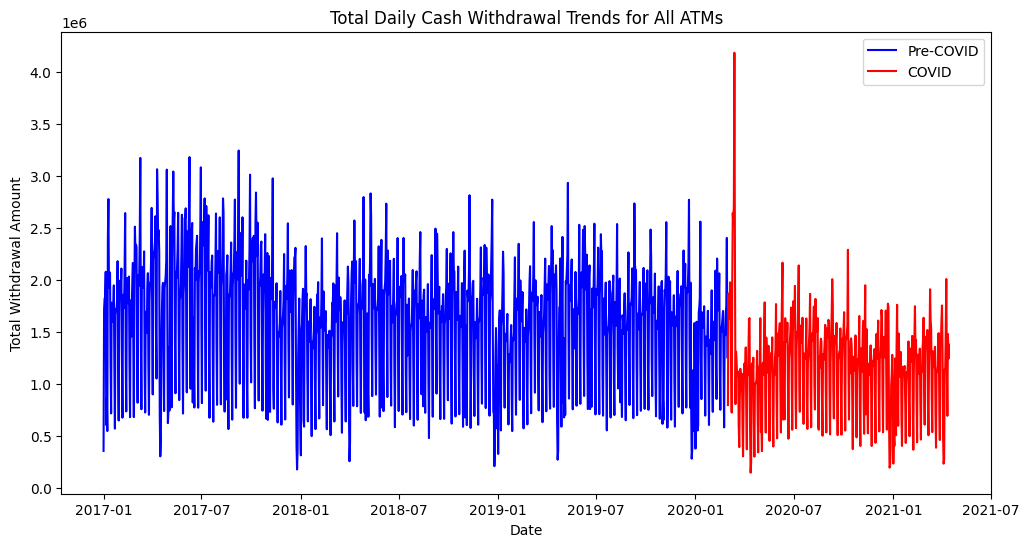

In [110]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a dataframe `df` with columns 'date', 'ATM XX', and 'total_withdrawals'
# The date column should be in datetime format
df['date'] = pd.to_datetime(df['date'])

# Split the dataset into pre-COVID and during COVID
pre_covid_date = pd.to_datetime("2020-03-01")  # Assuming the pre-COVID period ends on February 29th, 2020
pre_covid_data = df[df['date'] < pre_covid_date]
covid_data = df[df['date'] >= pre_covid_date]

# Get the list of all ATM columns
atm_columns = [col for col in df.columns if 'ATM' in col]

# Compute total withdrawals for each period
pre_covid_data['total_withdrawals'] = pre_covid_data[atm_columns].sum(axis=1)
covid_data['total_withdrawals'] = covid_data[atm_columns].sum(axis=1)

def plot_total_withdrawals(pre_covid_data, covid_data):
    plt.figure(figsize=(12, 6))
    plt.plot(pre_covid_data['date'], pre_covid_data['total_withdrawals'], label='Pre-COVID', color='blue')
    plt.plot(covid_data['date'], covid_data['total_withdrawals'], label='COVID', color='red')
    plt.xlabel('Date')
    plt.ylabel('Total Withdrawal Amount')
    plt.title('Total Daily Cash Withdrawal Trends for All ATMs')
    plt.legend()
    plt.show()

# Plot total withdrawals
plot_total_withdrawals(pre_covid_data, covid_data)


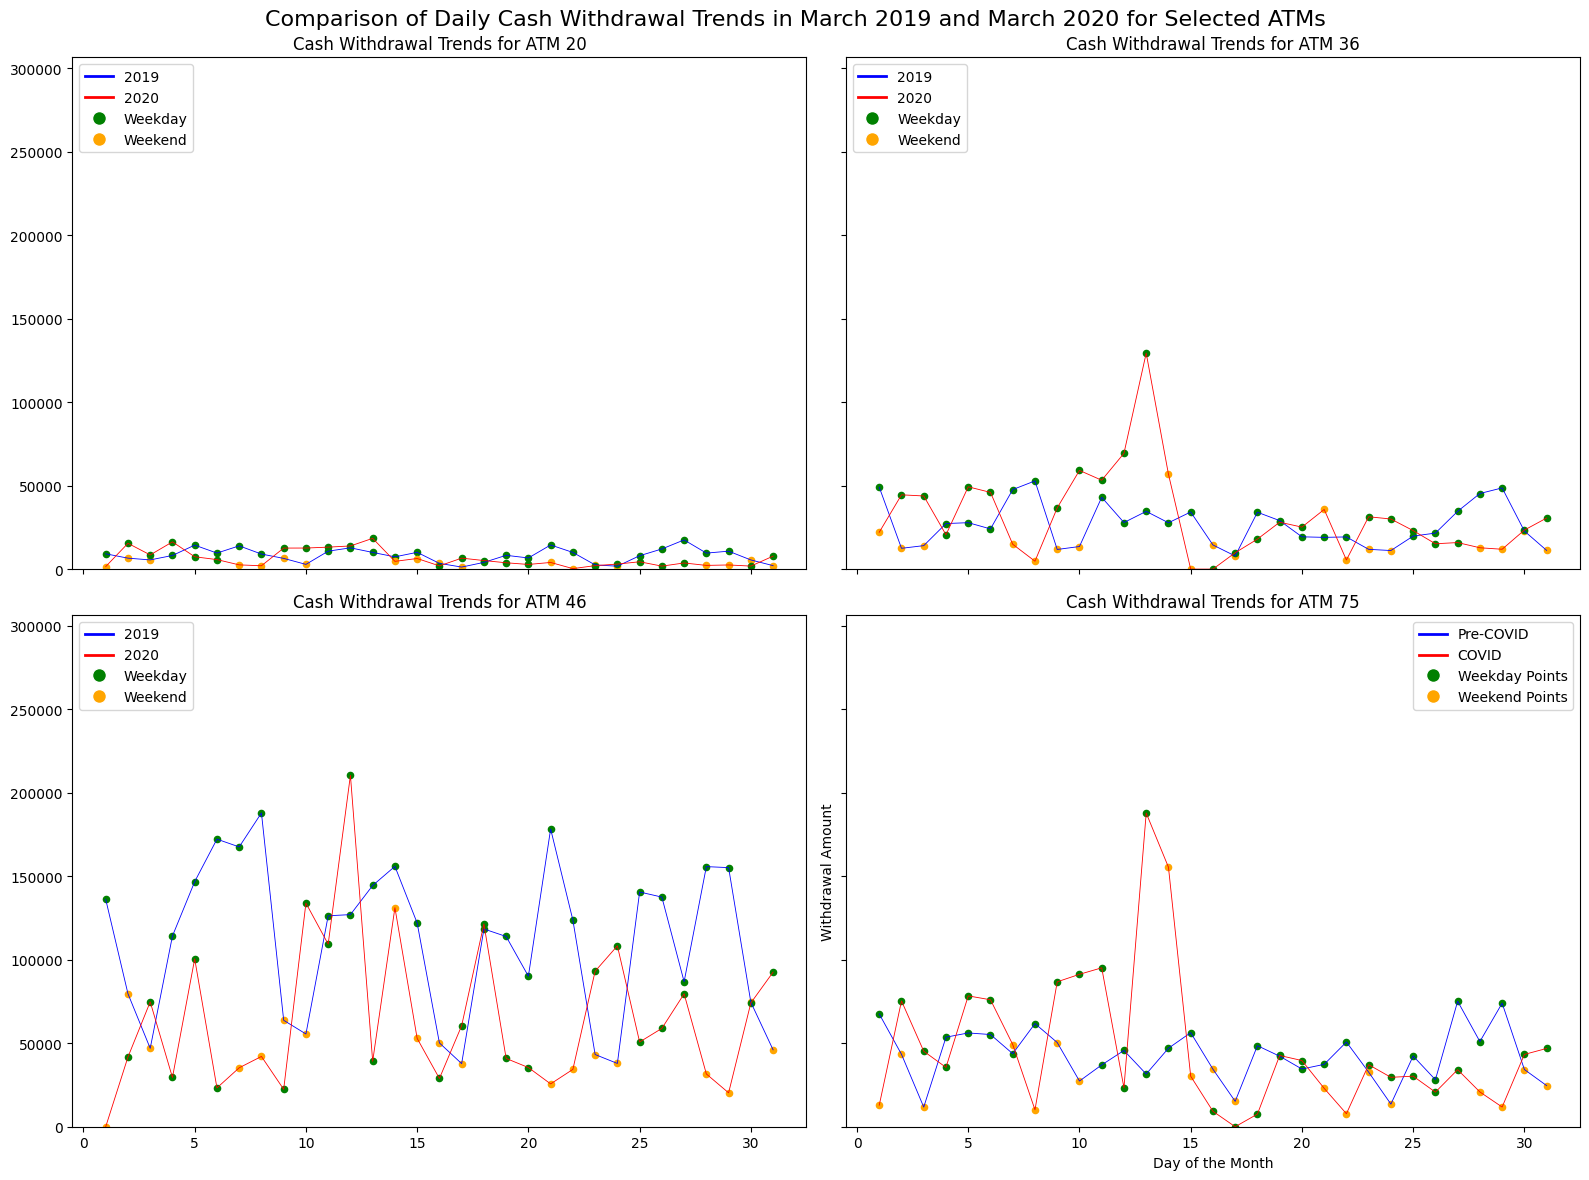

In [111]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a dataframe `df` with columns 'date', 'ATM XX', and 'total_withdrawals'
# The date column should be in datetime format
df['date'] = pd.to_datetime(df['date'])

# Split the dataset into March 2019 and March 2020
march_2019_data = df[(df['date'] >= pd.to_datetime("2019-03-01")) & (df['date'] <= pd.to_datetime("2019-03-31"))]
march_2020_data = df[(df['date'] >= pd.to_datetime("2020-03-01")) & (df['date'] <= pd.to_datetime("2020-03-31"))]

# Add a 'day' column to each dataframe
march_2019_data = march_2019_data.copy()
march_2019_data['day'] = march_2019_data['date'].dt.day
march_2020_data = march_2020_data.copy()
march_2020_data['day'] = march_2020_data['date'].dt.day

# Add 'weekday' column to each dataframe (0 - Monday, 6 - Sunday)
march_2019_data['weekday'] = march_2019_data['date'].dt.weekday
march_2020_data['weekday'] = march_2020_data['date'].dt.weekday

# Selected ATMs
selected_atms = ['ATM 20', 'ATM 36', 'ATM 46', 'ATM 75']

def plot_atm_withdrawals(ax, march_2019_data, march_2020_data, atm_id):
    for data, color in [(march_2019_data, 'blue'), (march_2020_data, 'red')]:
        weekdays = data[data['weekday'] < 5]
        weekends = data[data['weekday'] >= 5]
        ax.plot(data['day'], data[atm_id], color=color, linewidth=0.6)
        ax.scatter(weekdays['day'], weekdays[atm_id], color='green', s=20)
        ax.scatter(weekends['day'], weekends[atm_id], color='orange', s=20)
    ax.set_title(f'Cash Withdrawal Trends for {atm_id}')
    # Define the custom legend
    from matplotlib.lines import Line2D
    custom_lines = [Line2D([0], [0], color='blue', lw=2),
                    Line2D([0], [0], color='red', lw=2),
                    Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10),
                    Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10)]
    ax.legend(custom_lines, ['2019', '2020', 'Weekday', 'Weekend'], loc='upper left')


# Plot the selected ATMs
fig, axes = plt.subplots(2, 2, figsize=(16, 12), sharex=True, sharey=True)
axes = axes.flatten()

for i, atm_id in enumerate(selected_atms):
    plot_atm_withdrawals(axes[i], march_2019_data, march_2020_data, atm_id)

# Set common y-axis limit
max_withdrawal = max(df[selected_atms].max())
min_withdrawal = min(df[selected_atms].min())
for ax in axes:
    ax.set_ylim(min_withdrawal, max_withdrawal)

# Add the overall title
plt.suptitle("Comparison of Daily Cash Withdrawal Trends in March 2019 and March 2020 for Selected ATMs", fontsize=16)

# Now we add the legends manually
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='blue', lw=2),
                Line2D([0], [0], color='red', lw=2),
                Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10),
                Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10)]

plt.legend(custom_lines, ['Pre-COVID', 'COVID', 'Weekday Points', 'Weekend Points'])

plt.xlabel('Day of the Month')
plt.ylabel('Withdrawal Amount')
plt.tight_layout()
plt.savefig("D:/AGH/bankomaty_2022/pics/combined_march.png")
plt.show()


In [112]:
# Selected ATMs
selected_atms = ['ATM 20', 'ATM 36', 'ATM 46', 'ATM 75']

# Initialize an empty dataframe to store the results
summary = pd.DataFrame()

for atm_id in selected_atms:
    for data, year in [(nov_2019_data, 2019), (nov_2020_data, 2020)]:
        total_withdrawals = data[atm_id].sum()
        max_withdrawal = data[atm_id].max()
        min_withdrawal = data[atm_id].min()
        avg_withdrawal = data[atm_id].mean()
        summary = summary.append({
            'ATM ID': atm_id,
            'Year': year,
            'Total Withdrawals': total_withdrawals,
            'Max Withdrawal': max_withdrawal,
            'Min Withdrawal': min_withdrawal,
            'Average Withdrawal': avg_withdrawal
        }, ignore_index=True)

summary = summary[['ATM ID', 'Year', 'Total Withdrawals', 'Max Withdrawal', 'Min Withdrawal', 'Average Withdrawal']]
print(summary)

   ATM ID  Year  Total Withdrawals  Max Withdrawal  Min Withdrawal  \
0  ATM 20  2019             254290           17490            1220   
1  ATM 20  2020             194880           18430             300   
2  ATM 36  2019             817910           52830            7850   
3  ATM 36  2020             966860          129370               0   
4  ATM 46  2019            3437200          187950           37800   
5  ATM 46  2020            2003400          210500               0   
6  ATM 75  2019            1327510           75160           11750   
7  ATM 75  2020            1457610          187890               0   

   Average Withdrawal  
0         8202.903226  
1         6286.451613  
2        26384.193548  
3        31189.032258  
4       110877.419355  
5        64625.806452  
6        42822.903226  
7        47019.677419  


C:\Users\amachno\AppData\Local\Temp\ipykernel_25372\365297569.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append({
C:\Users\amachno\AppData\Local\Temp\ipykernel_25372\365297569.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append({
C:\Users\amachno\AppData\Local\Temp\ipykernel_25372\365297569.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append({
C:\Users\amachno\AppData\Local\Temp\ipykernel_25372\365297569.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append({
C:\Users\amachno\AppData\Local\Temp\ipykernel_25372\365297569.py:13: FutureW

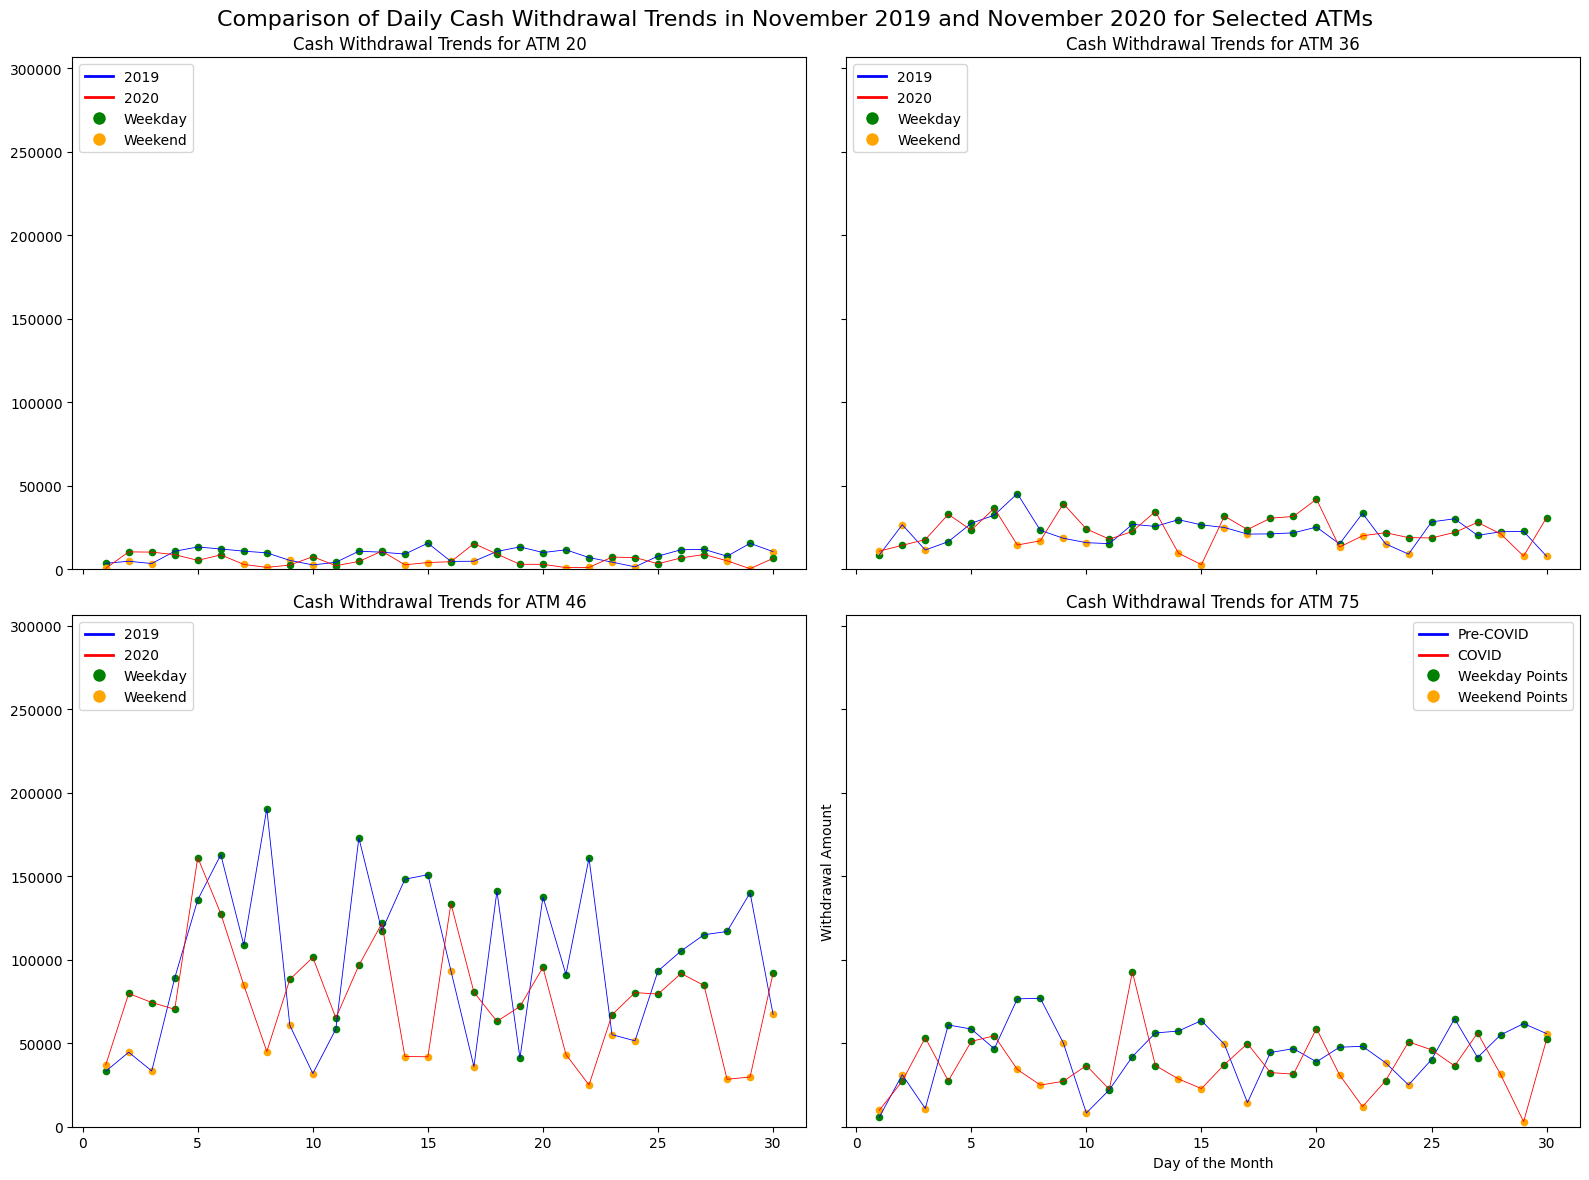

In [113]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a dataframe `df` with columns 'date', 'ATM XX', and 'total_withdrawals'
# The date column should be in datetime format
df['date'] = pd.to_datetime(df['date'])

# Split the dataset into March 2019 and March 2020
nov_2019_data = df[(df['date'] >= pd.to_datetime("2019-11-01")) & (df['date'] <= pd.to_datetime("2019-11-30"))]
nov_2020_data = df[(df['date'] >= pd.to_datetime("2020-11-01")) & (df['date'] <= pd.to_datetime("2020-11-30"))]

# Add a 'day' column to each dataframe
nov_2019_data = nov_2019_data.copy()
nov_2019_data['day'] = nov_2019_data['date'].dt.day
nov_2020_data = nov_2020_data.copy()
nov_2020_data['day'] = nov_2020_data['date'].dt.day

# Add 'weekday' column to each dataframe (0 - Monday, 6 - Sunday)
nov_2019_data['weekday'] = nov_2019_data['date'].dt.weekday
nov_2020_data['weekday'] = nov_2020_data['date'].dt.weekday

# Selected ATMs
selected_atms = ['ATM 20', 'ATM 36', 'ATM 46', 'ATM 75']

def plot_atm_withdrawals(ax, nov_2019_data, nov_2020_data, atm_id):
    for data, color in [(nov_2019_data, 'blue'), (nov_2020_data, 'red')]:
        weekdays = data[data['weekday'] < 5]
        weekends = data[data['weekday'] >= 5]
        ax.plot(data['day'], data[atm_id], color=color, linewidth=0.6)
        ax.scatter(weekdays['day'], weekdays[atm_id], color='green', s=20)
        ax.scatter(weekends['day'], weekends[atm_id], color='orange', s=20)
    ax.set_title(f'Cash Withdrawal Trends for {atm_id}')
    # Define the custom legend
    from matplotlib.lines import Line2D
    custom_lines = [Line2D([0], [0], color='blue', lw=2),
                    Line2D([0], [0], color='red', lw=2),
                    Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10),
                    Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10)]
    ax.legend(custom_lines, ['2019', '2020', 'Weekday', 'Weekend'], loc='upper left')


# Plot the selected ATMs
fig, axes = plt.subplots(2, 2, figsize=(16, 12), sharex=True, sharey=True)
axes = axes.flatten()

for i, atm_id in enumerate(selected_atms):
    plot_atm_withdrawals(axes[i], nov_2019_data, nov_2020_data, atm_id)

# Set common y-axis limit
max_withdrawal = max(df[selected_atms].max())
min_withdrawal = min(df[selected_atms].min())
for ax in axes:
    ax.set_ylim(min_withdrawal, max_withdrawal)

# Add the overall title
plt.suptitle("Comparison of Daily Cash Withdrawal Trends in November 2019 and November 2020 for Selected ATMs", fontsize=16)

# Now we add the legends manually
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='blue', lw=2),
                Line2D([0], [0], color='red', lw=2),
                Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10),
                Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10)]

plt.legend(custom_lines, ['Pre-COVID', 'COVID', 'Weekday Points', 'Weekend Points'])

plt.xlabel('Day of the Month')
plt.ylabel('Withdrawal Amount')
plt.tight_layout()
plt.savefig("D:/AGH/bankomaty_2022/pics/combined_november.png")
plt.show()


Text(0.5, 0, 'Day of the Month')

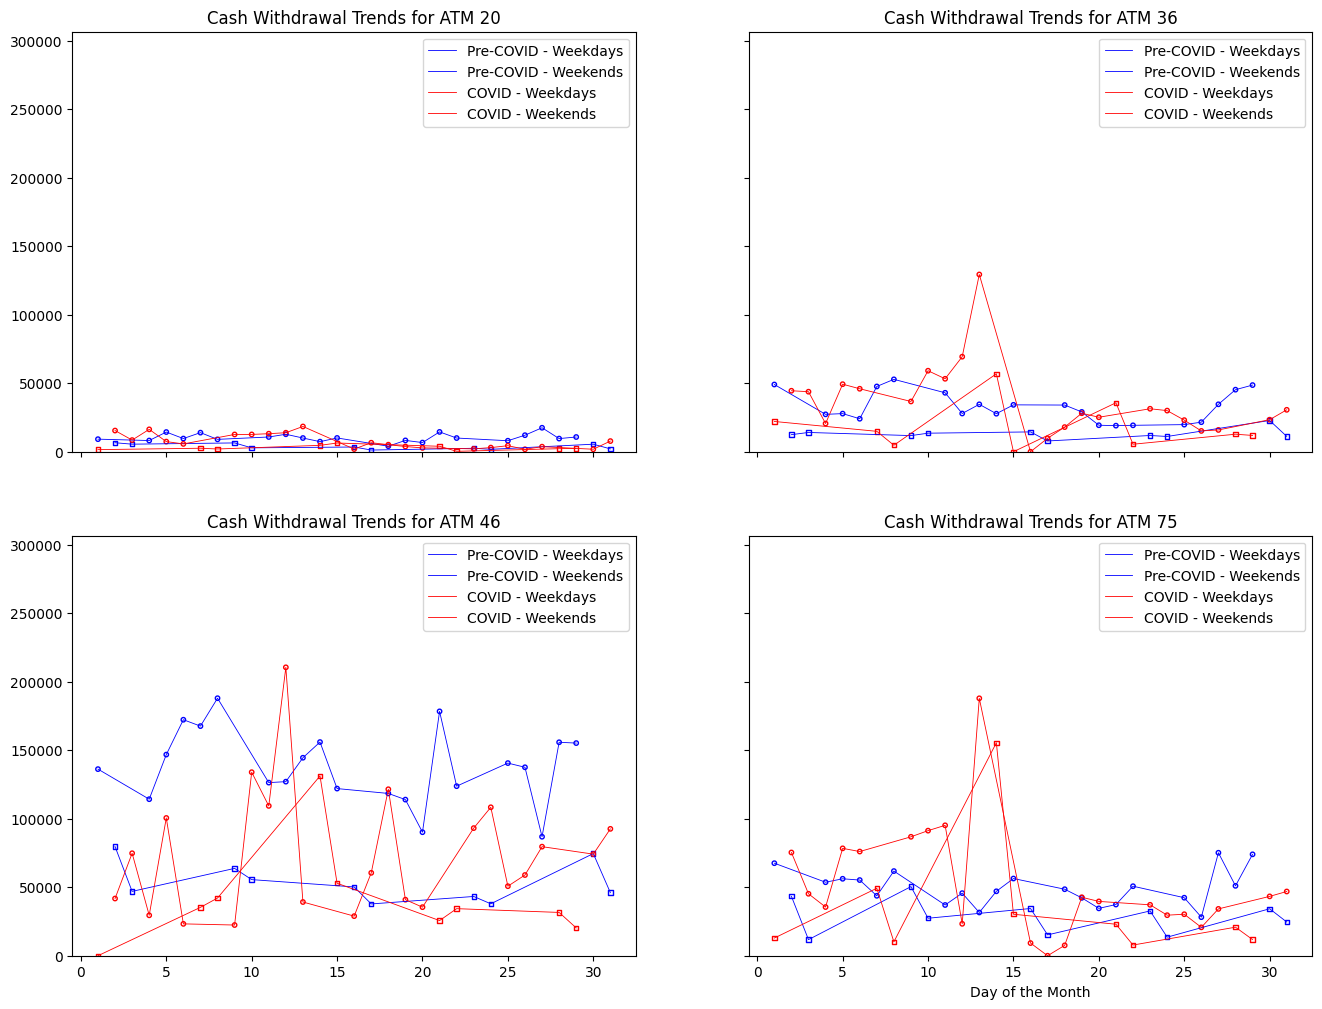

In [114]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a dataframe `df` with columns 'date', 'ATM XX', and 'total_withdrawals'
# The date column should be in datetime format
df['date'] = pd.to_datetime(df['date'])

# Split the dataset into March 2019 and March 2020
march_2019_data = df[(df['date'] >= pd.to_datetime("2019-03-01")) & (df['date'] <= pd.to_datetime("2019-03-31"))]
march_2020_data = df[(df['date'] >= pd.to_datetime("2020-03-01")) & (df['date'] <= pd.to_datetime("2020-03-31"))]

# Add a 'day' column to each dataframe
march_2019_data = march_2019_data.copy()
march_2019_data['day'] = march_2019_data['date'].dt.day
march_2020_data = march_2020_data.copy()
march_2020_data['day'] = march_2020_data['date'].dt.day

# Add 'weekday' column to each dataframe (0 - Monday, 6 - Sunday)
march_2019_data['weekday'] = march_2019_data['date'].dt.weekday
march_2020_data['weekday'] = march_2020_data['date'].dt.weekday

# Selected ATMs
selected_atms = ['ATM 20', 'ATM 36', 'ATM 46', 'ATM 75']

def plot_atm_withdrawals(ax, march_2019_data, march_2020_data, atm_id):
    for data, label, color in [(march_2019_data, 'Pre-COVID', 'blue'), (march_2020_data, 'COVID', 'red')]:
        weekdays = data[data['weekday'] < 5]
        weekends = data[data['weekday'] >= 5]
        ax.plot(weekdays['day'], weekdays[atm_id], label=f'{label} - Weekdays', color=color, linewidth=0.6)
        ax.plot(weekends['day'], weekends[atm_id], label=f'{label} - Weekends', color=color, linewidth=0.6)
        ax.scatter(weekdays['day'], weekdays[atm_id], color=color, marker='o', s=10, facecolors='none')
        ax.scatter(weekends['day'], weekends[atm_id], color=color, marker='s', s=10, facecolors='none')
    ax.set_title(f'Cash Withdrawal Trends for {atm_id}')
    ax.legend()

# Plot the selected ATMs
fig, axes = plt.subplots(2, 2, figsize=(16, 12), sharex=True, sharey=True)
axes = axes.flatten()

for i, atm_id in enumerate(selected_atms):
    plot_atm_withdrawals(axes[i], march_2019_data, march_2020_data, atm_id)

# Set common y-axis limit
max_withdrawal = max(df[selected_atms].max())
min_withdrawal = min(df[selected_atms].min())
for ax in axes:
    ax.set_ylim(min_withdrawal, max_withdrawal)

plt.xlabel('Day of the Month')


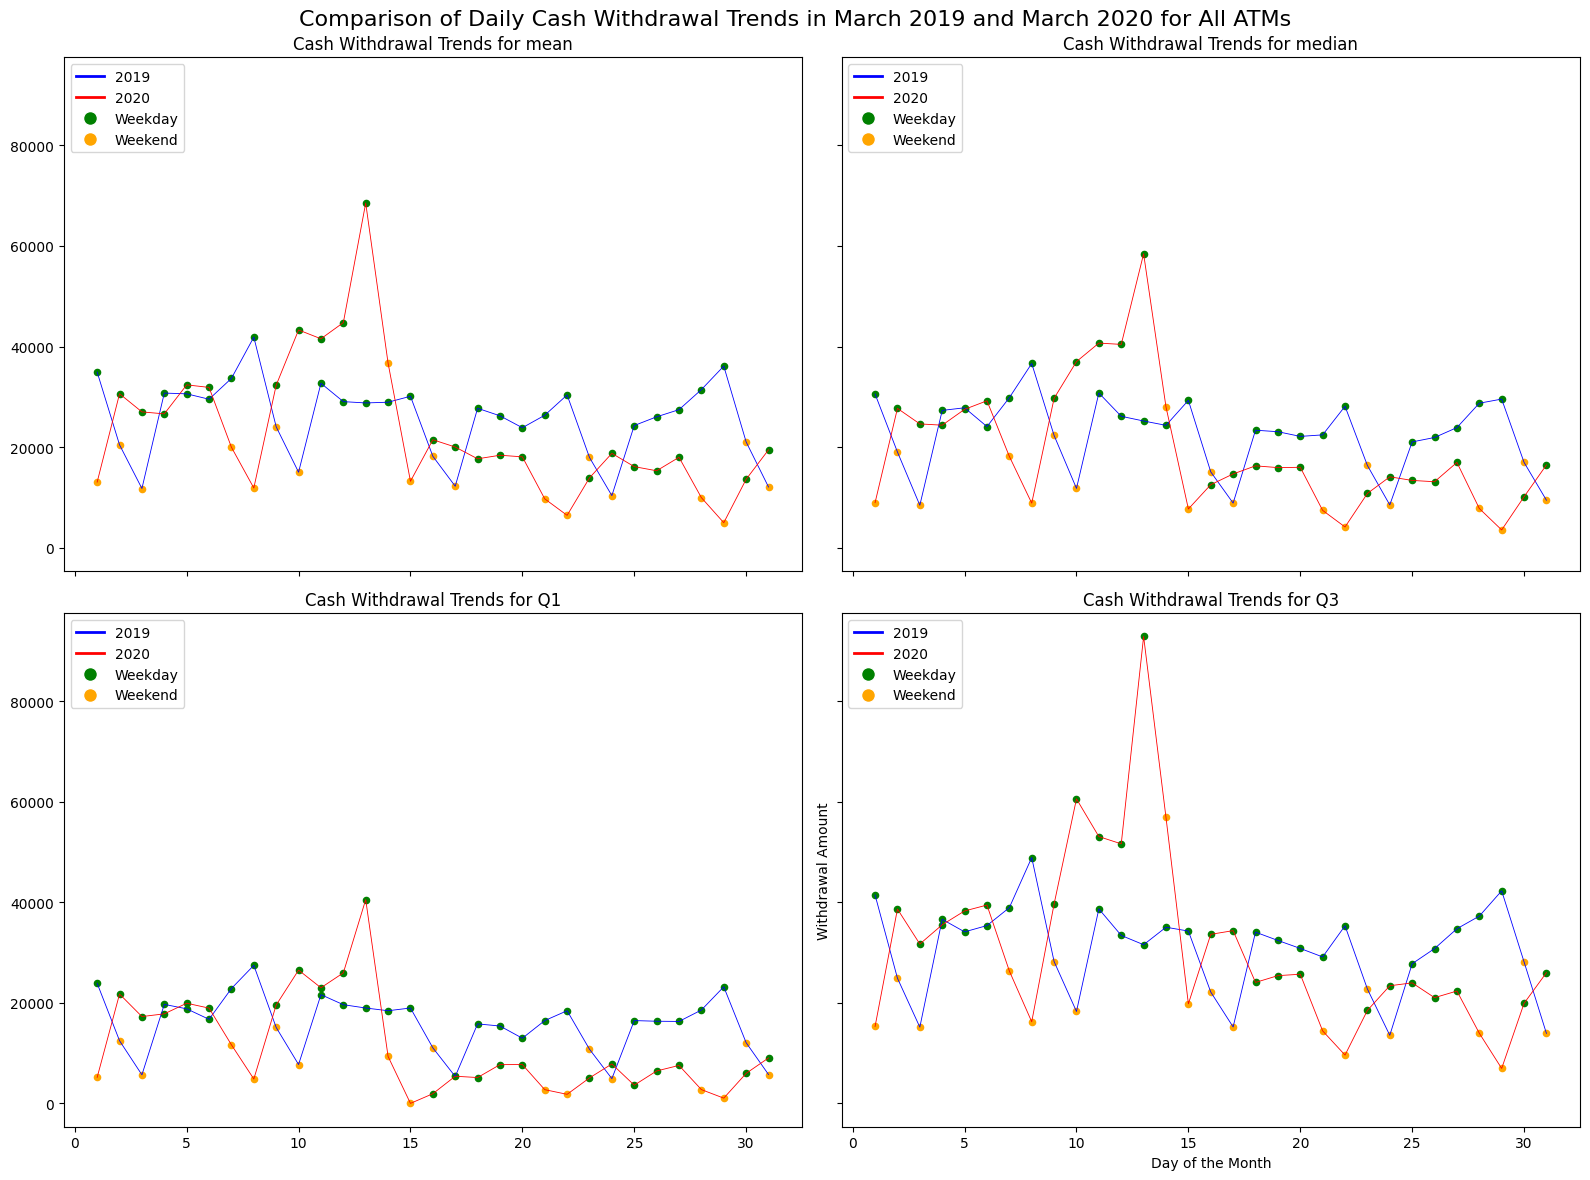

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a dataframe `df` with columns 'date', 'ATM XX', and 'total_withdrawals'
# The date column should be in datetime format
df['date'] = pd.to_datetime(df['date'])

# Split the dataset into March 2019 and March 2020
march_2019_data = df[(df['date'] >= pd.to_datetime("2019-03-01")) & (df['date'] <= pd.to_datetime("2019-03-31"))]
march_2020_data = df[(df['date'] >= pd.to_datetime("2020-03-01")) & (df['date'] <= pd.to_datetime("2020-03-31"))]

# Add a 'day' column to each dataframe
march_2019_data = march_2019_data.copy()
march_2019_data['day'] = march_2019_data['date'].dt.day
march_2020_data = march_2020_data.copy()
march_2020_data['day'] = march_2020_data['date'].dt.day

# Add 'weekday' column to each dataframe (0 - Monday, 6 - Sunday)
march_2019_data['weekday'] = march_2019_data['date'].dt.weekday
march_2020_data['weekday'] = march_2020_data['date'].dt.weekday

# Get list of ATM columns
atm_columns = [col for col in df.columns if 'ATM' in col]

# Calculate the mean, median, Q1, and Q3 for all ATMs for each day
for data in [march_2019_data, march_2020_data]:
    data['mean'] = data[atm_columns].mean(axis=1)
    data['median'] = data[atm_columns].median(axis=1)
    data['Q1'] = data[atm_columns].apply(lambda x: np.percentile(x, 25), axis=1)
    data['Q3'] = data[atm_columns].apply(lambda x: np.percentile(x, 75), axis=1)

# Selected statistics
selected_stats = ['mean', 'median', 'Q1', 'Q3']

def plot_stat_withdrawals(ax, march_2019_data, march_2020_data, stat):
    for data, color in [(march_2019_data, 'blue'), (march_2020_data, 'red')]:
        weekdays = data[data['weekday'] < 5]
        weekends = data[data['weekday'] >= 5]
        ax.plot(data['day'], data[stat], color=color, linewidth=0.6)
        ax.scatter(weekdays['day'], weekdays[stat], color='green', s=20)
        ax.scatter(weekends['day'], weekends[stat], color='orange', s=20)
    ax.set_title(f'Cash Withdrawal Trends for {stat}')
    # Define the custom legend
    from matplotlib.lines import Line2D
    custom_lines = [Line2D([0], [0], color='blue', lw=2),
                    Line2D([0], [0], color='red', lw=2),
                    Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10),
                    Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10)]
    ax.legend(custom_lines, ['2019', '2020', 'Weekday', 'Weekend'], loc='upper left')


# Plot the selected statistics
fig, axes = plt.subplots(2, 2, figsize=(16, 12), sharex=True, sharey=True)
axes = axes.flatten()

for i, stat in enumerate(selected_stats):
    plot_stat_withdrawals(axes[i], march_2019_data, march_2020_data, stat)

# Add the overall title
plt.suptitle("Comparison of Daily Cash Withdrawal Trends in March 2019 and March 2020 for All ATMs", fontsize=16)

plt.xlabel('Day of the Month')
plt.ylabel('Withdrawal Amount')
plt.tight_layout()
plt.savefig("D:/AGH/bankomaty_2022/pics/combined_all_march.png")
plt.show()


In [116]:
march_2019_data[['date','mean',	'median', 'Q1',	'Q3']]

,date,mean,median,Q1,Q3
789,2019-03-01,34906.885246,30550.0,23880.0,41450.0
790,2019-03-02,20435.901639,19010.0,12460.0,24900.0
791,2019-03-03,11752.459016,8420.0,5680.0,15160.0
792,2019-03-04,30734.426230,27290.0,19690.0,36610.0
793,2019-03-05,30586.885246,27810.0,18810.0,34120.0
794,2019-03-06,29514.754098,24070.0,16720.0,35370.0
795,2019-03-07,33660.655738,29820.0,22850.0,38940.0
796,2019-03-08,41866.557377,36620.0,27460.0,48900.0
797,2019-03-09,24024.262295,22300.0,15100.0,28210.0
798,2019-03-10,14991.311475,11770.0,7730.0,18280.0


In [117]:
march_2020_data[['date','mean',	'median', 'Q1',	'Q3']]

,date,mean,median,Q1,Q3
1155,2020-03-01,13029.180328,8940.0,5180.0,15300.0
1156,2020-03-02,30601.311475,27690.0,21750.0,38650.0
1157,2020-03-03,26991.311475,24600.0,17270.0,31700.0
1158,2020-03-04,26599.344262,24350.0,17810.0,35530.0
1159,2020-03-05,32368.688525,27500.0,19920.0,38280.0
1160,2020-03-06,31865.737705,29200.0,18950.0,39450.0
1161,2020-03-07,19958.032787,18140.0,11650.0,26340.0
1162,2020-03-08,11853.606557,8840.0,4850.0,16230.0
1163,2020-03-09,32310.819672,29700.0,19570.0,39670.0
1164,2020-03-10,43289.180328,37000.0,26510.0,60570.0


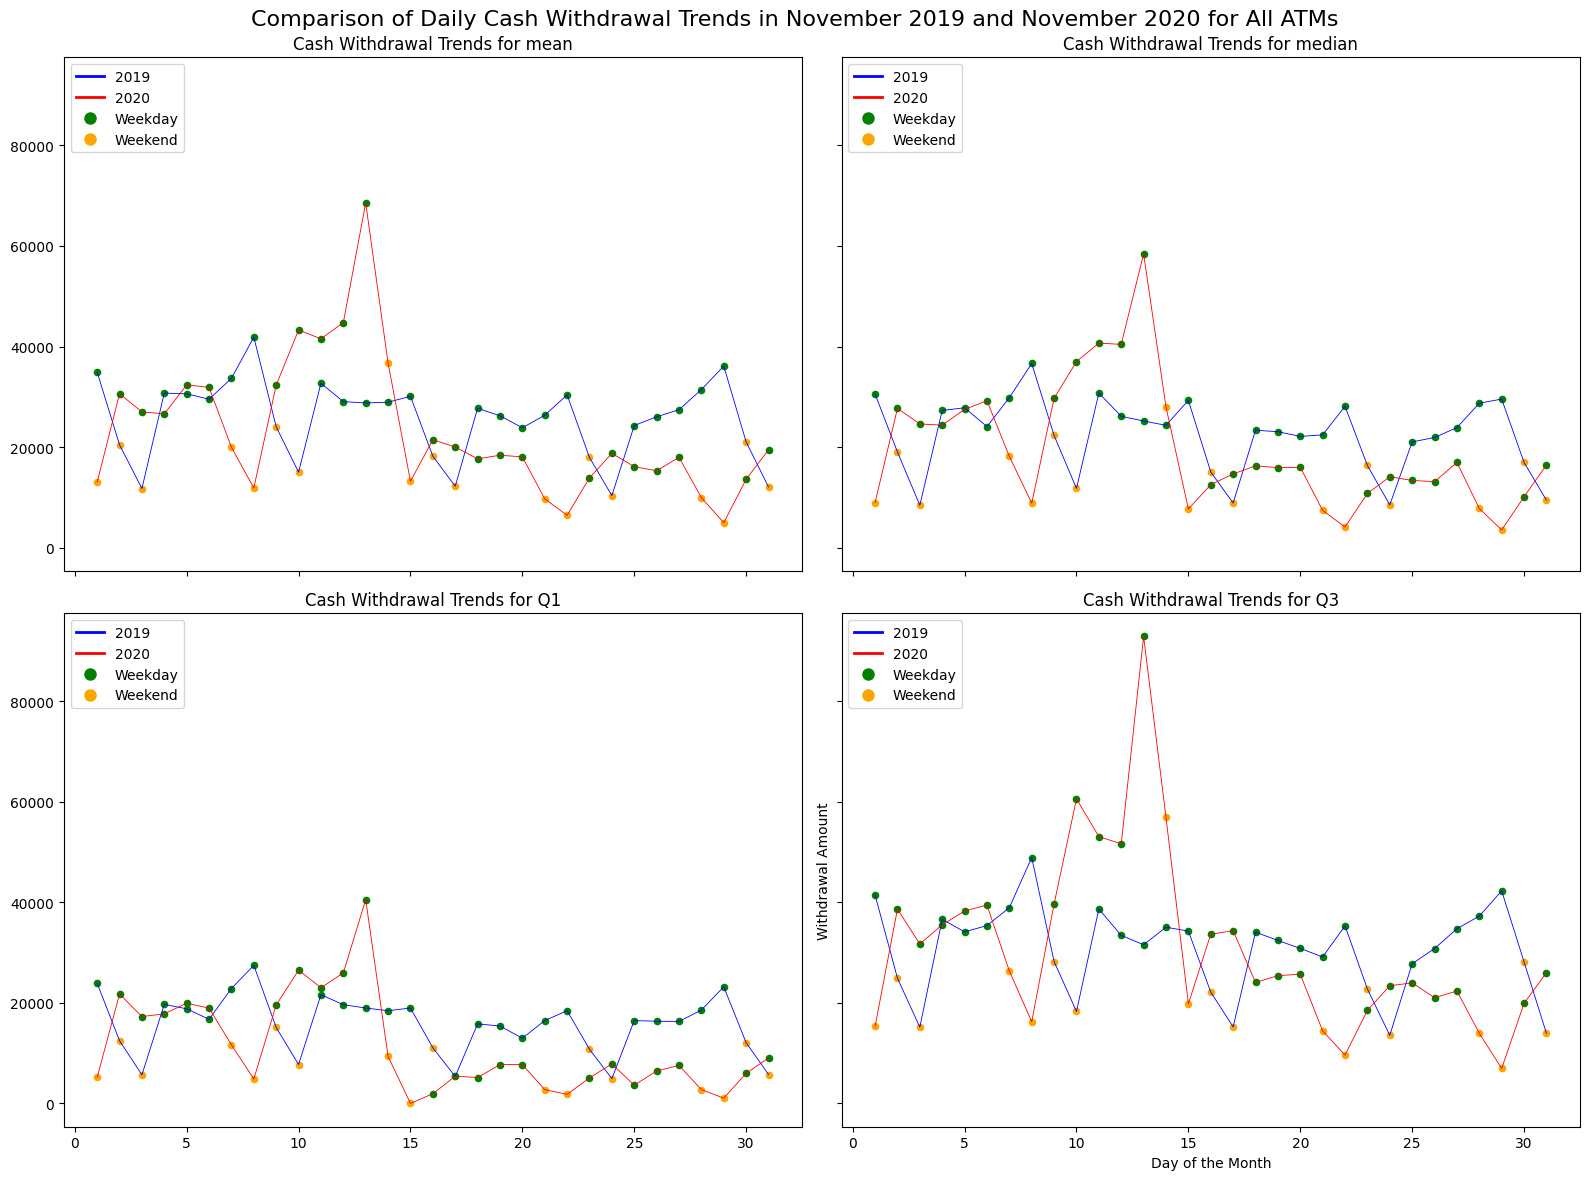

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a dataframe `df` with columns 'date', 'ATM XX', and 'total_withdrawals'
# The date column should be in datetime format
df['date'] = pd.to_datetime(df['date'])

# Split the dataset into March 2019 and March 2020
nov_2019_data = df[(df['date'] >= pd.to_datetime("2019-03-01")) & (df['date'] <= pd.to_datetime("2019-03-31"))]
nov_2020_data = df[(df['date'] >= pd.to_datetime("2020-03-01")) & (df['date'] <= pd.to_datetime("2020-03-31"))]

# Add a 'day' column to each dataframe
nov_2019_data = nov_2019_data.copy()
nov_2019_data['day'] = nov_2019_data['date'].dt.day
nov_2020_data = nov_2020_data.copy()
nov_2020_data['day'] = nov_2020_data['date'].dt.day

# Add 'weekday' column to each dataframe (0 - Monday, 6 - Sunday)
nov_2019_data['weekday'] = nov_2019_data['date'].dt.weekday
nov_2020_data['weekday'] = nov_2020_data['date'].dt.weekday

# Get list of ATM columns
atm_columns = [col for col in df.columns if 'ATM' in col]

# Calculate the mean, median, Q1, and Q3 for all ATMs for each day
for data in [nov_2019_data, nov_2020_data]:
    data['mean'] = data[atm_columns].mean(axis=1)
    data['median'] = data[atm_columns].median(axis=1)
    data['Q1'] = data[atm_columns].apply(lambda x: np.percentile(x, 25), axis=1)
    data['Q3'] = data[atm_columns].apply(lambda x: np.percentile(x, 75), axis=1)

# Selected statistics
selected_stats = ['mean', 'median', 'Q1', 'Q3']

def plot_stat_withdrawals(ax, nov_2019_data, march_2020_data, stat):
    for data, color in [(nov_2019_data, 'blue'), (nov_2020_data, 'red')]:
        weekdays = data[data['weekday'] < 5]
        weekends = data[data['weekday'] >= 5]
        ax.plot(data['day'], data[stat], color=color, linewidth=0.6)
        ax.scatter(weekdays['day'], weekdays[stat], color='green', s=20)
        ax.scatter(weekends['day'], weekends[stat], color='orange', s=20)
    ax.set_title(f'Cash Withdrawal Trends for {stat}')
    # Define the custom legend
    from matplotlib.lines import Line2D
    custom_lines = [Line2D([0], [0], color='blue', lw=2),
                    Line2D([0], [0], color='red', lw=2),
                    Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10),
                    Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10)]
    ax.legend(custom_lines, ['2019', '2020', 'Weekday', 'Weekend'], loc='upper left')


# Plot the selected statistics
fig, axes = plt.subplots(2, 2, figsize=(16, 12), sharex=True, sharey=True)
axes = axes.flatten()

for i, stat in enumerate(selected_stats):
    plot_stat_withdrawals(axes[i], nov_2019_data, nov_2020_data, stat)

# Add the overall title
plt.suptitle("Comparison of Daily Cash Withdrawal Trends in November 2019 and November 2020 for All ATMs", fontsize=16)

plt.xlabel('Day of the Month')
plt.ylabel('Withdrawal Amount')
plt.tight_layout()
plt.savefig("D:/AGH/bankomaty_2022/pics/combined_all_november.png")
plt.show()


In [119]:
nov_2019_data[['date','mean',	'median', 'Q1',	'Q3']]

,date,mean,median,Q1,Q3
789,2019-03-01,34906.885246,30550.0,23880.0,41450.0
790,2019-03-02,20435.901639,19010.0,12460.0,24900.0
791,2019-03-03,11752.459016,8420.0,5680.0,15160.0
792,2019-03-04,30734.426230,27290.0,19690.0,36610.0
793,2019-03-05,30586.885246,27810.0,18810.0,34120.0
794,2019-03-06,29514.754098,24070.0,16720.0,35370.0
795,2019-03-07,33660.655738,29820.0,22850.0,38940.0
796,2019-03-08,41866.557377,36620.0,27460.0,48900.0
797,2019-03-09,24024.262295,22300.0,15100.0,28210.0
798,2019-03-10,14991.311475,11770.0,7730.0,18280.0


In [120]:
nov_2020_data[['date','mean',	'median', 'Q1',	'Q3']]

,date,mean,median,Q1,Q3
1155,2020-03-01,13029.180328,8940.0,5180.0,15300.0
1156,2020-03-02,30601.311475,27690.0,21750.0,38650.0
1157,2020-03-03,26991.311475,24600.0,17270.0,31700.0
1158,2020-03-04,26599.344262,24350.0,17810.0,35530.0
1159,2020-03-05,32368.688525,27500.0,19920.0,38280.0
1160,2020-03-06,31865.737705,29200.0,18950.0,39450.0
1161,2020-03-07,19958.032787,18140.0,11650.0,26340.0
1162,2020-03-08,11853.606557,8840.0,4850.0,16230.0
1163,2020-03-09,32310.819672,29700.0,19570.0,39670.0
1164,2020-03-10,43289.180328,37000.0,26510.0,60570.0


C:\Users\amachno\AppData\Local\Temp\ipykernel_25372\1017975379.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['total_withdrawals'] = df.sum(axis=1)


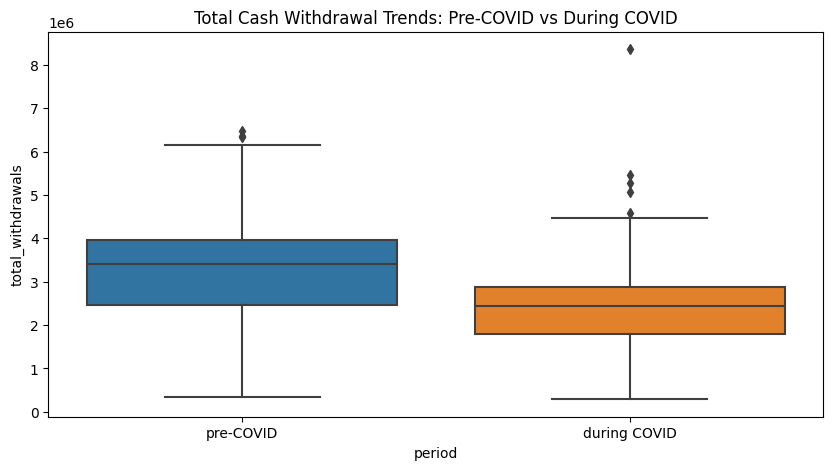

In [121]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Compute total withdrawals for each day
df['total_withdrawals'] = df.sum(axis=1)

# Reshape data into long format with only 'date' and 'total_withdrawals'
df_long = df[['date', 'total_withdrawals']].copy()

# Create a binary variable to indicate pre-COVID and during COVID periods
cutoff_date = pd.to_datetime('2020-03-01')  # Assuming this date as the start of the COVID period
df_long['period'] = df_long['date'].apply(lambda x: 'pre-COVID' if x < cutoff_date else 'during COVID')

# Create the boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x='period', y='total_withdrawals', data=df_long)
plt.title('Total Cash Withdrawal Trends: Pre-COVID vs During COVID')

# # Calculate average values for pre-COVID and during COVID periods
# avg_values = df_long.groupby('period')['total_withdrawals'].mean()

# # Add a star to indicate the average
# plt.scatter(x=df_long['period'].unique(), y=avg_values, marker='*', color='red', s=150, zorder=10)

# Save the plot to the specified folder
output_path = 'D:/AGH/bankomaty_2022/pics/boxplot_total_cash_withdrawals.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


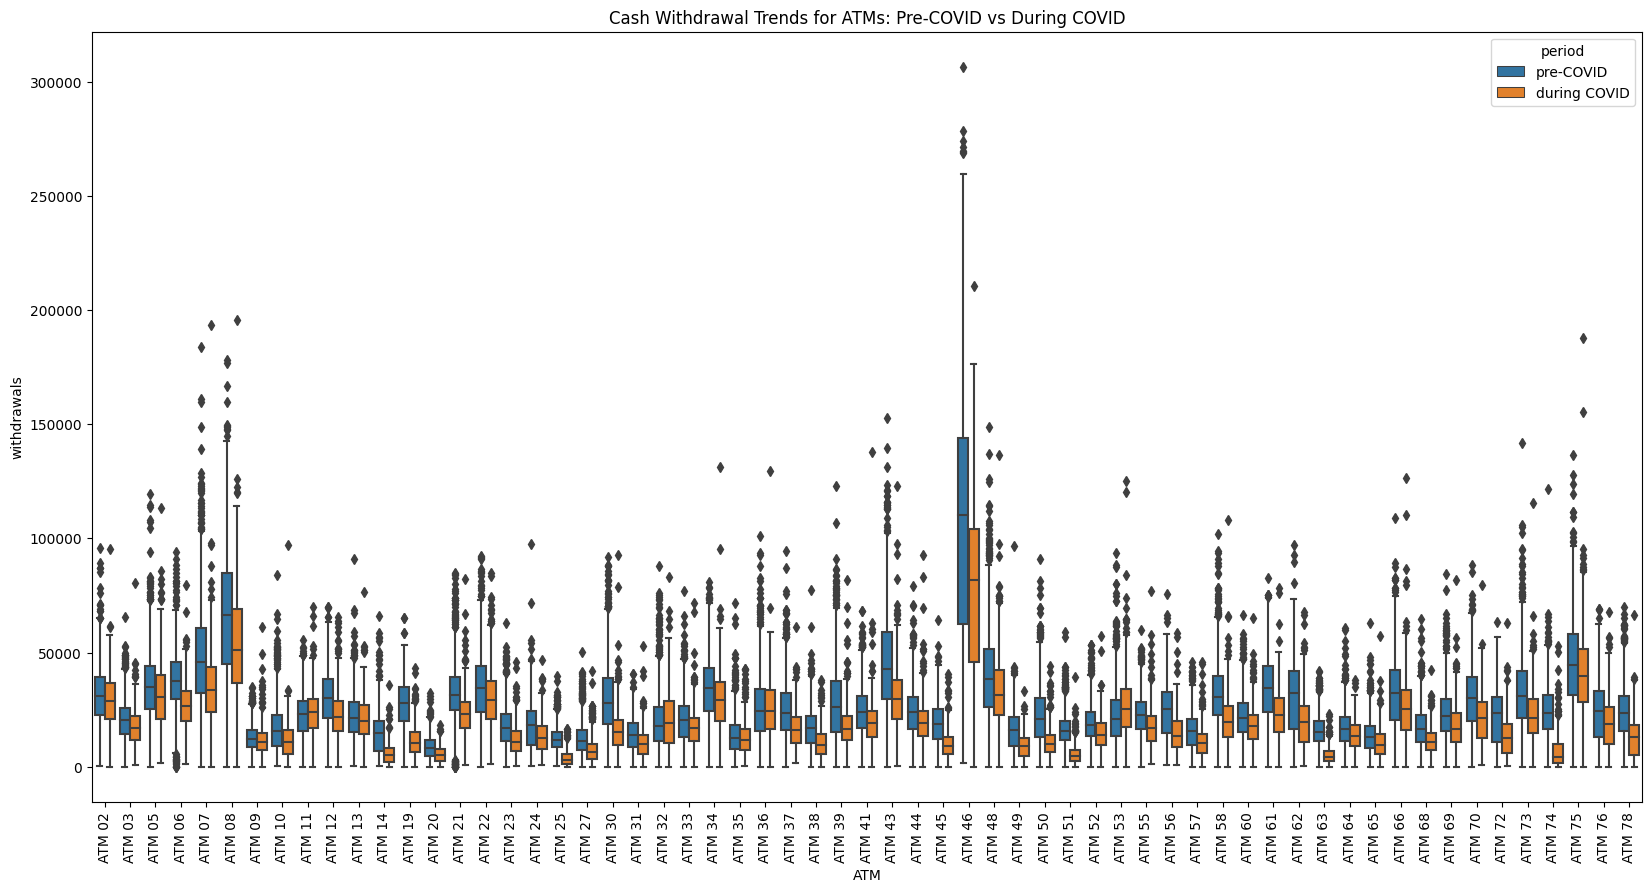

In [122]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Remove the 'total_withdrawals' column
df = df.drop(columns=['total_withdrawals'])

# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Reshape data into long format
df_long = df.melt(id_vars='date', var_name='ATM', value_name='withdrawals')

# Create a binary variable to indicate pre-COVID and during COVID periods
cutoff_date = pd.to_datetime('2020-03-01')  # Assuming this date as the start of the COVID period
df_long['period'] = df_long['date'].apply(lambda x: 'pre-COVID' if x < cutoff_date else 'during COVID')

# Create the boxplot
plt.figure(figsize=(20, 10))
sns.boxplot(x='ATM', y='withdrawals', hue='period', data=df_long)
plt.xticks(rotation=90)
plt.title('Cash Withdrawal Trends for ATMs: Pre-COVID vs During COVID')

# Calculate average values for each ATM and period
avg_values = df_long.groupby(['ATM', 'period'])['withdrawals'].mean().reset_index()


# Save the plot to the specified folder
output_path = 'D:/AGH/bankomaty_2022/pics/boxplot_cash_withdrawals.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


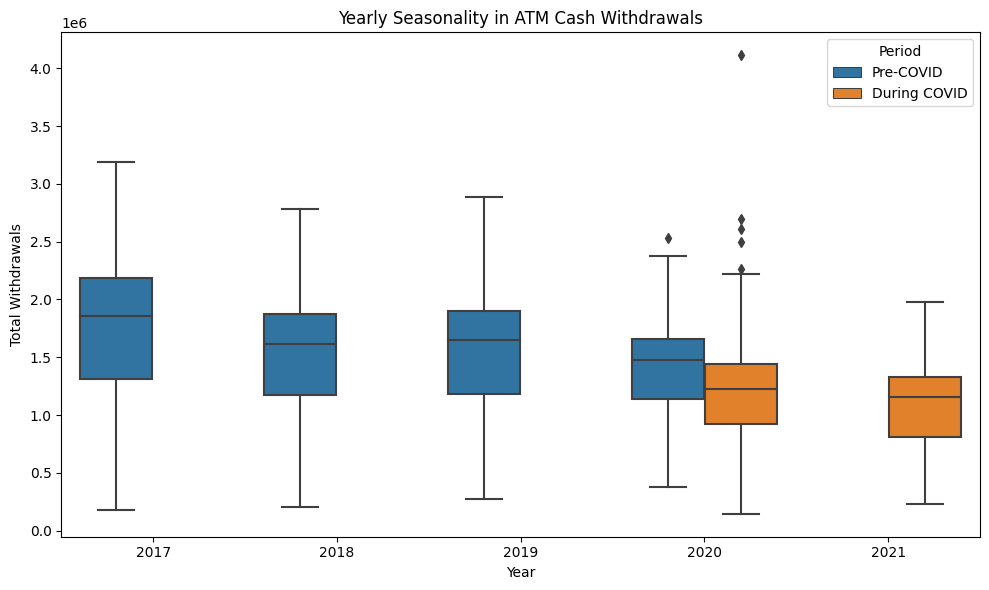

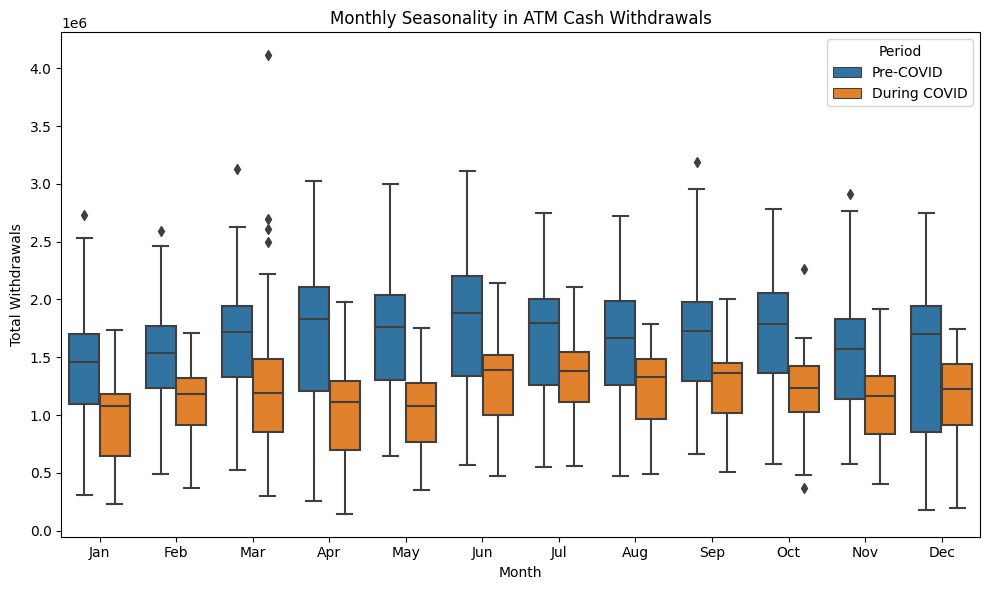

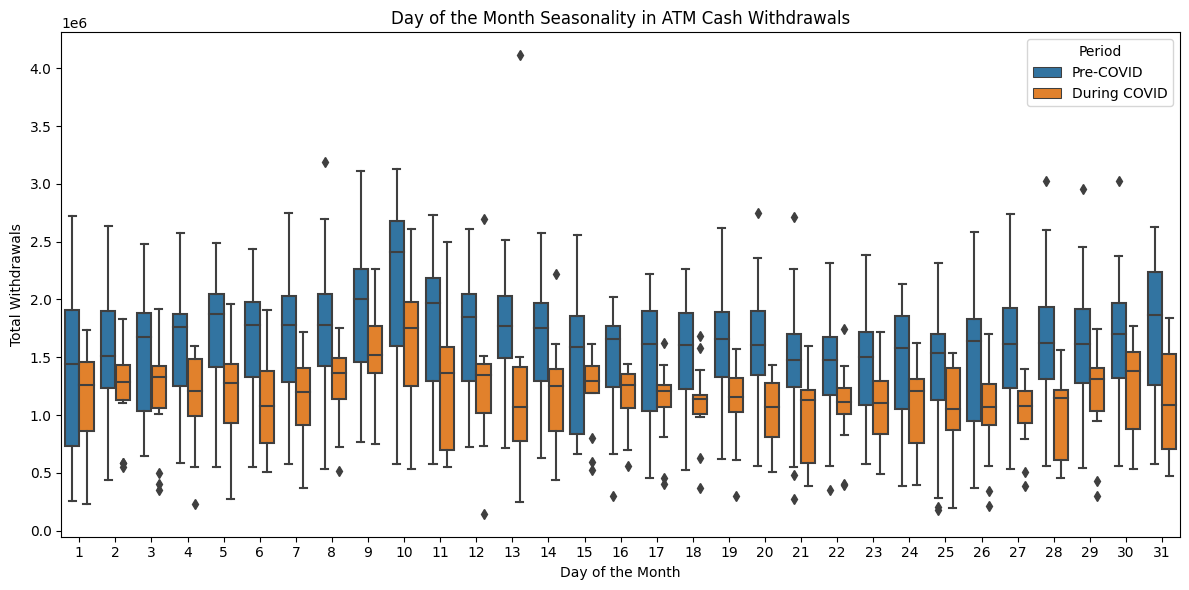

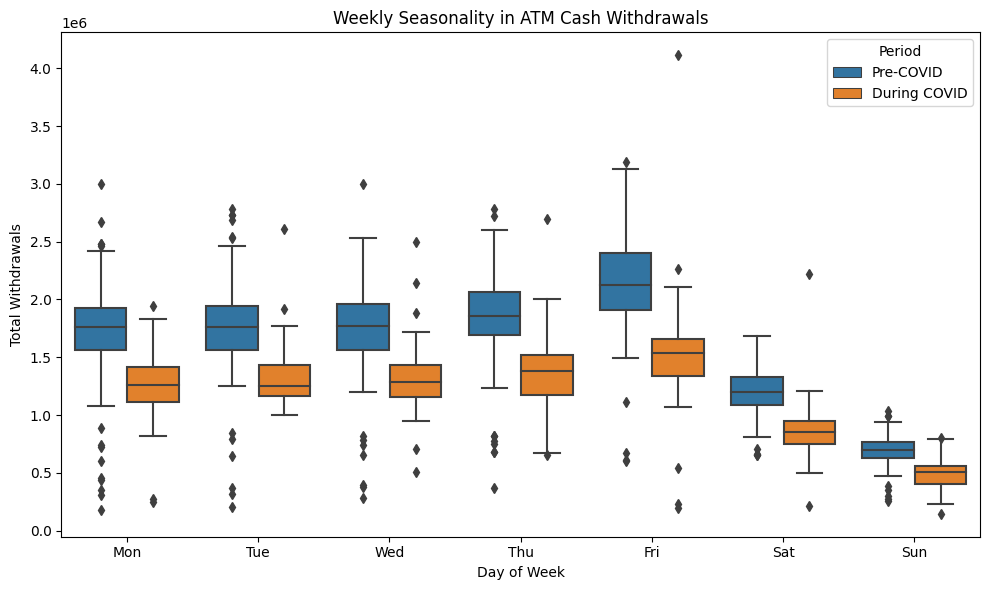

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing the data
df['date'] = pd.to_datetime(df['date'])
df['total_withdrawals'] = df.iloc[:, 1:-1].sum(axis=1)

# Add a column to indicate if the date is within the COVID period
# Assuming the COVID period starts from 2020-03-01
df['is_covid_period'] = df['date'].apply(lambda x: 1 if x >= pd.Timestamp('2020-03-01') else 0)

# Extracting seasonal components
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['week'] = df['date'].dt.isocalendar().week
df['day_of_month'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.dayofweek

# Function to update the legend labels
def update_legend_labels(ax):
    legend = ax.get_legend()
    new_labels = ['Pre-COVID', 'During COVID']
    for t, l in zip(legend.texts, new_labels):
        t.set_text(l)
    legend.set_title('Period')

# Yearly seasonality
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='year', y='total_withdrawals', hue='is_covid_period', data=df, ax=ax)
ax.set_title('Yearly Seasonality in ATM Cash Withdrawals')
ax.set_ylabel('Total Withdrawals')
ax.set_xlabel('Year')
update_legend_labels(ax)
plt.tight_layout()
plt.savefig('D:\\AGH\\bankomaty_2022\\pics\\yearly_seasonality.png')
plt.show()

# Monthly seasonality
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='month', y='total_withdrawals', hue='is_covid_period', data=df, ax=ax)
ax.set_title('Monthly Seasonality in ATM Cash Withdrawals')
ax.set_ylabel('Total Withdrawals')
ax.set_xlabel('Month')

# Update x-axis labels to display month names
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

update_legend_labels(ax)
plt.tight_layout()
plt.savefig('D:\\AGH\\bankomaty_2022\\pics\\monthly_seasonality.png')
plt.show()


# Day of the month seasonality
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x='day_of_month', y='total_withdrawals', hue='is_covid_period', data=df, ax=ax)
ax.set_title('Day of the Month Seasonality in ATM Cash Withdrawals')
ax.set_ylabel('Total Withdrawals')
ax.set_xlabel('Day of the Month')
update_legend_labels(ax)

plt.tight_layout()
plt.savefig('D:\\AGH\\bankomaty_2022\\pics\\day_of_month_seasonality.png')
plt.show()

# Weekly seasonality
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='day_of_week', y='total_withdrawals', hue='is_covid_period', data=df, ax=ax)
ax.set_title('Weekly Seasonality in ATM Cash Withdrawals')
ax.set_ylabel('Total Withdrawals')
ax.set_xlabel('Day of Week')
update_legend_labels(ax)

# Update x-axis labels with abbreviated names of weekdays
weekday_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
ax.set_xticklabels(weekday_labels)

plt.tight_layout()
plt.savefig('D:\\AGH\\bankomaty_2022\\pics\\weekly_seasonality.png')
plt.show()


In [124]:
print(df.head())

        date  ATM 02  ATM 03  ATM 05  ATM 06  ATM 07  ATM 08  ATM 09  ATM 10  \
0 2017-01-01    2670    3040    9940    4390    6780   11220     470    1660   
1 2017-01-02   27150   20140   34110   44440   24930   84960   15060    9450   
2 2017-01-03   23950   29860   32340   43300   56210   63140    9700   23910   
3 2017-01-04   36560   13040   34610   41800   51340   70730   12840    7330   
4 2017-01-05   21920   27030   39010   55060   54800   41080   17690   21540   

   ATM 11  ...  ATM 75  ATM 76  ATM 78  total_withdrawals  is_covid_period  \
0    2230  ...    6400    7510       0             354640                0   
1   27820  ...   18140   21250   30420            1686570                0   
2   24580  ...   47270   10780   40240            1780570                0   
3   23420  ...   66970   19710   22020            1799880                0   
4   24150  ...   47720   22270   28870            2046760                0   

   year  month  week  day_of_month  day_of_week  


In [125]:
yearly_seasonality = df.groupby(['year', 'is_covid_period'])['total_withdrawals'].mean().reset_index()
yearly_seasonality['is_covid_period'] = yearly_seasonality['is_covid_period'].map({0: 'Pre-COVID', 1: 'During COVID'})
yearly_seasonality.pivot_table(index='year', columns='is_covid_period', values='total_withdrawals')


is_covid_period,During COVID,Pre-COVID
year,,
2017,NaN,1.739486e+06
2018,NaN,1.529864e+06
2019,NaN,1.532104e+06
2020,1.188264e+06,1.404014e+06
2021,1.084979e+06,NaN


In [126]:
monthly_seasonality = df.pivot_table(values='total_withdrawals', index='month', columns='is_covid_period', aggfunc='mean')
monthly_seasonality.columns = ['Pre-COVID', 'During COVID']
monthly_seasonality


,Pre-COVID,During COVID
month,,
1,1.382443e+06,9.632368e+05
2,1.498457e+06,1.109828e+06
3,1.614223e+06,1.279265e+06
4,1.655864e+06,1.021042e+06
5,1.668619e+06,1.037399e+06
6,1.760196e+06,1.272854e+06
7,1.660209e+06,1.320468e+06
8,1.602776e+06,1.211389e+06
9,1.669061e+06,1.262624e+06


In [127]:
day_of_month_seasonality = df.groupby(['is_covid_period', 'day_of_month'])['total_withdrawals'].mean().unstack(level=0)
day_of_month_seasonality.columns = ['Pre-COVID', 'During COVID']
day_of_month_seasonality


,Pre-COVID,During COVID
day_of_month,,
1,1.361458e+06,1.140022e+06
2,1.499686e+06,1.221684e+06
3,1.509778e+06,1.192442e+06
4,1.618877e+06,1.154079e+06
5,1.690053e+06,1.150337e+06
6,1.614785e+06,1.076068e+06
7,1.686123e+06,1.108757e+06
8,1.734959e+06,1.281757e+06
9,1.875124e+06,1.518048e+06


In [128]:
day_of_month_seasonality = df.groupby(['is_covid_period', 'day_of_week'])['total_withdrawals'].mean().unstack(level=0)
day_of_month_seasonality.columns = ['Pre-COVID', 'During COVID']
day_of_month_seasonality

,Pre-COVID,During COVID
day_of_week,,
0,1.728011e+06,1.242780e+06
1,1.750250e+06,1.325603e+06
2,1.758066e+06,1.318508e+06
3,1.854645e+06,1.370426e+06
4,2.139148e+06,1.524888e+06
5,1.204290e+06,8.566079e+05
6,6.975378e+05,5.001471e+05


In [129]:
df.columns


Index(['date', 'ATM 02', 'ATM 03', 'ATM 05', 'ATM 06', 'ATM 07', 'ATM 08',
       'ATM 09', 'ATM 10', 'ATM 11', 'ATM 12', 'ATM 13', 'ATM 14', 'ATM 19',
       'ATM 20', 'ATM 21', 'ATM 22', 'ATM 23', 'ATM 24', 'ATM 25', 'ATM 27',
       'ATM 30', 'ATM 31', 'ATM 32', 'ATM 33', 'ATM 34', 'ATM 35', 'ATM 36',
       'ATM 37', 'ATM 38', 'ATM 39', 'ATM 41', 'ATM 43', 'ATM 44', 'ATM 45',
       'ATM 46', 'ATM 48', 'ATM 49', 'ATM 50', 'ATM 51', 'ATM 52', 'ATM 53',
       'ATM 55', 'ATM 56', 'ATM 57', 'ATM 58', 'ATM 60', 'ATM 61', 'ATM 62',
       'ATM 63', 'ATM 64', 'ATM 65', 'ATM 66', 'ATM 68', 'ATM 69', 'ATM 70',
       'ATM 72', 'ATM 73', 'ATM 74', 'ATM 75', 'ATM 76', 'ATM 78',
       'total_withdrawals', 'is_covid_period', 'year', 'month', 'week',
       'day_of_month', 'day_of_week'],
      dtype='object')

In [173]:

import pandas as pd

# Define the file path for special days data
special_days_file = r'D:\AGH\bankomaty_2022\data\modelling_data\specialDays.csv'

# Read the special days data into a DataFrame
special_days_df = pd.read_csv(special_days_file)

# Rename the columns in special_days_df
special_days_df.columns = ['date', 'special_day', 'SD 01', 'SD 02', 'SD 03', 'SD 04', 'SD 05', 'SD 06', 'SD 07', 'SD 08', 'SD 09', 'SD 10']

# Convert the 'date' column in both DataFrames to datetime type
df['date'] = pd.to_datetime(df['date'])
special_days_df['date'] = pd.to_datetime(special_days_df['date'])

# Merge the two DataFrames based on the 'date' column
merged_df = pd.merge(df, special_days_df, on='date')

# Define the list of special day columns
special_day_columns = ['SD 01', 'SD 02', 'SD 03', 'SD 04', 'SD 05', 'SD 06', 'SD 07', 'SD 08', 'SD 09', 'SD 10']

# Create the "SD" column based on the conditions
merged_df['SD'] = 'Normal'
for col in special_day_columns:
    merged_df.loc[merged_df[col] == 1, 'SD'] = col


C:\Users\amachno\AppData\Local\Temp\ipykernel_25372\931970462.py:14: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  special_days_df['date'] = pd.to_datetime(special_days_df['date'])


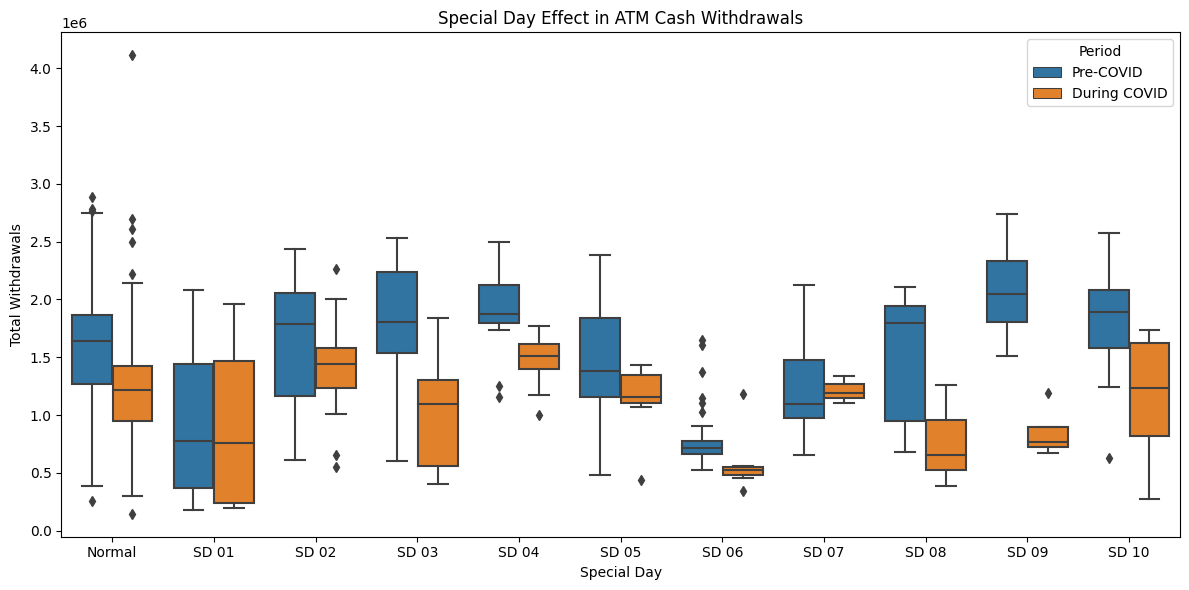

In [174]:
# Create a sorted version of the dataframe
df_sorted = merged_df.sort_values('SD')

fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x='SD', y='total_withdrawals', hue='is_covid_period', data=df_sorted, ax=ax)
ax.set_title('Special Day Effect in ATM Cash Withdrawals')
ax.set_ylabel('Total Withdrawals')
ax.set_xlabel('Special Day')
update_legend_labels(ax)

plt.tight_layout()
plt.savefig('D:\\AGH\\bankomaty_2022\\pics\\special_day_effect.png')
plt.show()



In [175]:
# Group by 'SD' and 'is_covid_period', then describe 'withdrawals'
description = df_sorted.groupby(['SD', 'is_covid_period'])['total_withdrawals'].describe()

# Extract relevant statistics
stats = description.loc[:, ['min', '25%', '50%', '75%', 'max']]


In [189]:
from scipy import stats
import pandas as pd
import numpy as np

# assuming df is your dataframe and 'ATM 02' through 'ATM 78' are the columns for each ATM
atm_cols = [col for col in df_sorted.columns if 'ATM' in col]

# prepare a dataframe to hold the results
results_df = pd.DataFrame(columns=['ATM', 'day_of_week', 'significant'])

# iterate over ATMs and days of the week
for atm_col in atm_cols:
    for day in range(7):
        # get the withdrawals for this ATM on this day
        day_withdrawals = df_sorted[df_sorted['day_of_week'] == day][atm_col]
        
        # get the withdrawals for this ATM on all other days
        other_withdrawals = df_sorted[df_sorted['day_of_week'] != day][atm_col]
        
        # perform t-test
        t, p = stats.ttest_ind(day_withdrawals, other_withdrawals)
        
        # append the result to the results dataframe
        # we mark it as significant if p < 0.05
        results_df = results_df.append({
            'ATM': atm_col,
            'day_of_week': day,
            'significant': int(p < 0.05)
        }, ignore_index=True)

# correct for multiple testing using the Bonferroni correction
alpha = 0.05 / results_df.shape[0]
results_df['significant'] = (results_df['significant'] < alpha).astype(int)

results_df


C:\Users\amachno\AppData\Local\Temp\ipykernel_25372\3772720719.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\amachno\AppData\Local\Temp\ipykernel_25372\3772720719.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\amachno\AppData\Local\Temp\ipykernel_25372\3772720719.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\amachno\AppData\Local\Temp\ipykernel_25372\3772720719.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\amachno\AppData\Local\Temp\ipykernel_25

,ATM,day_of_week,significant
0,ATM 02,0,0
1,ATM 02,1,0
2,ATM 02,2,0
3,ATM 02,3,0
4,ATM 02,4,0
...,...,...,...
422,ATM 78,2,0
423,ATM 78,3,0
424,ATM 78,4,0
425,ATM 78,5,0


In [190]:
significance_counts = results_df.groupby('day_of_week')['significant'].sum()

print(significance_counts)


day_of_week
0    16
1     5
2     5
3     5
4     0
5     3
6     1
Name: significant, dtype: int32


In [218]:
from scipy import stats
import pandas as pd
import numpy as np

# prepare a dataframe to hold the results
results_df = pd.DataFrame(columns=['ATM', 'day_of_week', 'significant', 'period'])

# iterate over ATMs, days of the week, and COVID periods
for atm_col in atm_cols:
    for day in range(7):
        for covid_period in [0, 1]:
            # get the withdrawals for this ATM on this day during this period
            day_withdrawals = df[(df['day_of_week'] == day) & (df['is_covid_period'] == covid_period)][atm_col]

            # get the withdrawals for this ATM on all other days during this period
            other_withdrawals = df[(df['day_of_week'] != day) & (df['is_covid_period'] == covid_period)][atm_col]

            # perform t-test
            t, p = stats.ttest_ind(day_withdrawals, other_withdrawals, equal_var=False, nan_policy='omit')

            # append the result to the results dataframe
            # we mark it as significant if p < 0.05
            results_df = results_df.append({
                'ATM': atm_col,
                'day_of_week': day,
                'significant': int(p < 0.05 / 854),
                'period': 'covid' if covid_period == 1 else 'pre_covid'
            }, ignore_index=True)




results_df


C:\Users\amachno\AppData\Local\Temp\ipykernel_25372\1915393348.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\amachno\AppData\Local\Temp\ipykernel_25372\1915393348.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\amachno\AppData\Local\Temp\ipykernel_25372\1915393348.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\amachno\AppData\Local\Temp\ipykernel_25372\1915393348.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\amachno\AppData\Local\Temp\ipykernel_25

,ATM,day_of_week,significant,period
0,ATM 02,0,1,pre_covid
1,ATM 02,0,0,covid
2,ATM 02,1,0,pre_covid
3,ATM 02,1,1,covid
4,ATM 02,2,0,pre_covid
...,...,...,...,...
849,ATM 78,4,0,covid
850,ATM 78,5,1,pre_covid
851,ATM 78,5,0,covid
852,ATM 78,6,1,pre_covid


In [217]:
results_df.shape[0]

854

In [220]:
significance_counts = results_df.groupby(['day_of_week', 'period'])['significant'].sum()

# Create a dictionary mapping numbers to day names
day_name_dict = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 
                 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

# Rename the day of week index level
significance_counts.index = significance_counts.index.set_levels(
    significance_counts.index.levels[0].map(day_name_dict.get), level=0)

# Save the result to an excel file
significance_counts.to_excel("D:\\AGH\\bankomaty_2022\\data\\significance_counts.xlsx")

# Reshape the data
reshaped_counts = significance_counts.unstack(level=0)

# Save the reshaped data to an excel file
reshaped_counts.to_excel("D:\\AGH\\bankomaty_2022\\data\\reshaped_significance_counts.xlsx")

reshaped_counts



day_of_week,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
period,,,,,,,
covid,0,4,1,6,26,43,58
pre_covid,22,29,23,48,61,57,60
